In [1]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

2024-03-05 15:48:18.527586: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-05 15:48:18.815955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 15:48:18.815984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 15:48:18.849146: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 15:48:18.922030: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
"""
if gpus:
    try:
        # Utiliser uniquement le GPU 0
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        print(e)
"""
gpus

2024-03-05 15:48:21.438091: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.562819: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.562868: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7722805241461832160
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3710910464
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17642117048398722827
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-03-05 15:48:21.577636: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.577711: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.577728: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.789961: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.790034: I external/local_xla/xla/stream_executor

In [4]:
if tf.test.gpu_device_name():
    print('GPU trouvé : {}'.format(tf.test.gpu_device_name()))
else:
    print("Aucun GPU trouvé")

GPU trouvé : /device:GPU:0


2024-03-05 15:48:21.798537: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.798642: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.798662: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.798967: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:21.799002: I tensorflow/core/common_runtime/gpu/gpu

In [5]:

# Define the directory paths
normal_dir = 'chest_xray/train/NORMAL'
pneumonia_dir = 'chest_xray/train/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
train_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(train_df)

                                                   file      label
0                     chest_xray/train/NORMAL/.DS_Store     normal
1             chest_xray/train/NORMAL/IM-0115-0001.jpeg     normal
2             chest_xray/train/NORMAL/IM-0117-0001.jpeg     normal
3             chest_xray/train/NORMAL/IM-0119-0001.jpeg     normal
4             chest_xray/train/NORMAL/IM-0122-0001.jpeg     normal
...                                                 ...        ...
5213  chest_xray/train/PNEUMONIA/person99_virus_183....  pneumonia
5214  chest_xray/train/PNEUMONIA/person9_bacteria_38...  pneumonia
5215  chest_xray/train/PNEUMONIA/person9_bacteria_39...  pneumonia
5216  chest_xray/train/PNEUMONIA/person9_bacteria_40...  pneumonia
5217  chest_xray/train/PNEUMONIA/person9_bacteria_41...  pneumonia

[5218 rows x 2 columns]


In [6]:
# Define the directory paths
normal_dir = 'chest_xray/test/NORMAL'
pneumonia_dir = 'chest_xray/test/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
test_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(test_df)

                                                  file      label
0             chest_xray/test/NORMAL/IM-0001-0001.jpeg     normal
1             chest_xray/test/NORMAL/IM-0003-0001.jpeg     normal
2             chest_xray/test/NORMAL/IM-0005-0001.jpeg     normal
3             chest_xray/test/NORMAL/IM-0006-0001.jpeg     normal
4             chest_xray/test/NORMAL/IM-0007-0001.jpeg     normal
..                                                 ...        ...
619  chest_xray/test/PNEUMONIA/person96_bacteria_46...  pneumonia
620  chest_xray/test/PNEUMONIA/person96_bacteria_46...  pneumonia
621  chest_xray/test/PNEUMONIA/person97_bacteria_46...  pneumonia
622  chest_xray/test/PNEUMONIA/person99_bacteria_47...  pneumonia
623  chest_xray/test/PNEUMONIA/person99_bacteria_47...  pneumonia

[624 rows x 2 columns]


In [7]:
# Define the directory paths
normal_dir = 'chest_xray/val/NORMAL'
pneumonia_dir = 'chest_xray/val/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
val_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(val_df)

                                                 file      label
0                     chest_xray/val/NORMAL/.DS_Store     normal
1     chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg     normal
2     chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg     normal
3     chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg     normal
4     chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg     normal
5     chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg     normal
6     chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg     normal
7     chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg     normal
8     chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg     normal
9                  chest_xray/val/PNEUMONIA/.DS_Store  pneumonia
10  chest_xray/val/PNEUMONIA/person1946_bacteria_4...  pneumonia
11  chest_xray/val/PNEUMONIA/person1946_bacteria_4...  pneumonia
12  chest_xray/val/PNEUMONIA/person1947_bacteria_4...  pneumonia
13  chest_xray/val/PNEUMONIA/person1949_bacteria_4...  pneumonia
14  chest_xray/val/PNEUMO

Générateur des images

In [8]:
# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255.,  # scale pixel values to [0, 1]
    shear_range=0,  # randomly apply shearing transformations
    zoom_range=0,  # randomly zooming inside pictures
    horizontal_flip=False  # randomly flip half of the images horizontally
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 5216 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.


/home/user/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(
/home/user/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(


Found 624 validated image filenames belonging to 2 classes.


Création du modèle

In [9]:
""" model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])"""

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#model.compile(tf.keras.optimizers.Adam(learning_rate= 0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7),
              metrics=['accuracy'])

2024-03-05 15:48:40.197693: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:40.197853: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:40.197881: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:40.198241: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-05 15:48:40.198255: I tensorflow/core/common_runtime/gpu/gpu

Entraînement du modèle

In [13]:
history = model.fit(
      x=train_generator,
      steps_per_epoch=1,  # nombre d'images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=25,  # nombre d'images = batch_size * steps
      verbose=2,
      #workers=15,
      use_multiprocessing=False,
      validation_freq=1
      )

Epoch 1/5
1/1 - 2s - loss: 0.6932 - accuracy: 0.4062 - val_loss: 0.6931 - val_accuracy: 0.5000 - 2s/epoch - 2s/step


2024-03-05 15:49:38.039394: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10825490275572067754
2024-03-05 15:49:38.039450: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 8032001466756066870


Epoch 2/5
1/1 - 1s - loss: 0.6933 - accuracy: 0.0625 - 1s/epoch - 1s/step
Epoch 3/5
1/1 - 1s - loss: 0.6932 - accuracy: 0.3438 - 963ms/epoch - 963ms/step
Epoch 4/5
1/1 - 1s - loss: 0.6932 - accuracy: 0.2812 - 926ms/epoch - 926ms/step
Epoch 5/5
1/1 - 1s - loss: 0.6932 - accuracy: 0.1875 - 997ms/epoch - 997ms/step


In [11]:
model.evaluate(validation_generator)

1/1 [==============================] - 0s 341ms/step - loss: 0.6931 - accuracy: 0.5000


[0.693140983581543, 0.5]

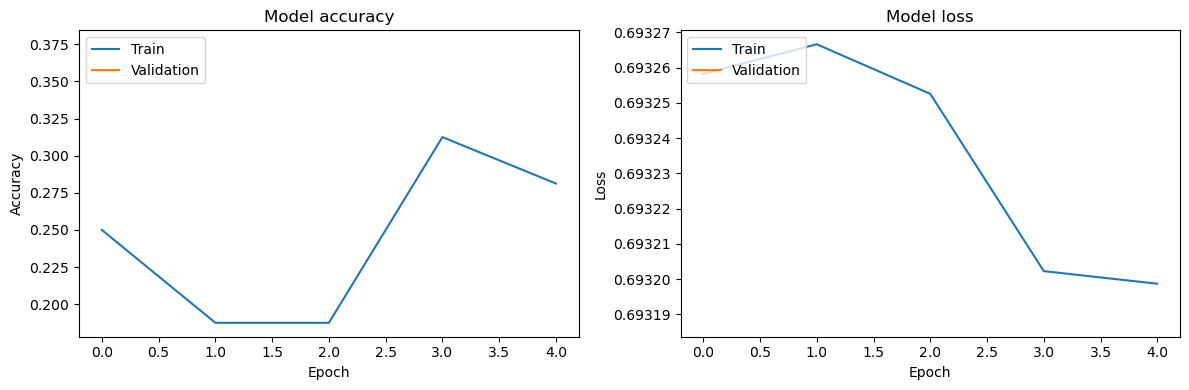

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


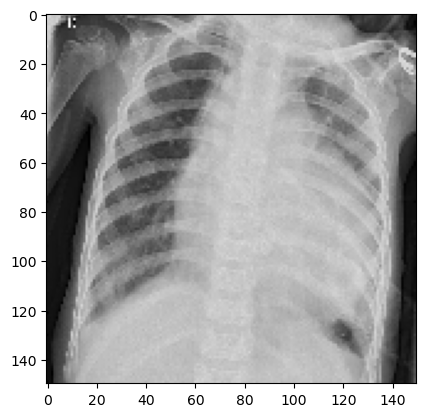

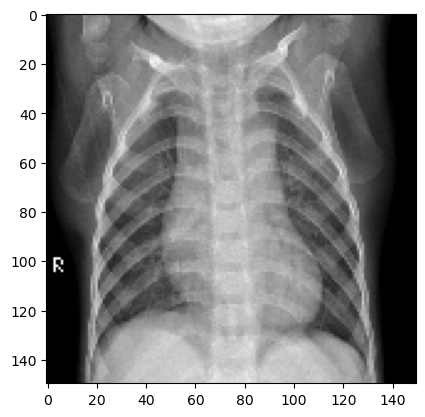

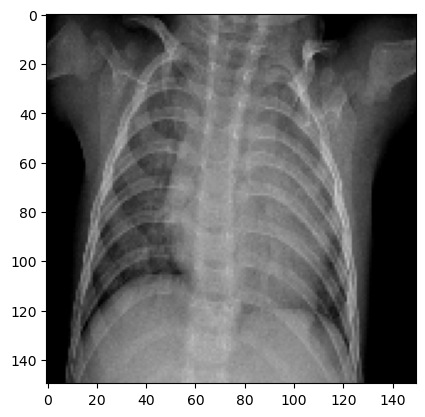

In [42]:
# Obtenez un lot de données de validation
x_val, y_val = next(test_generator)

# Choisissez une image dans le lot (par exemple, la première image)
images = x_val[:3]

# Affichez l'image
for e in images :
    plt.imshow(e)
    plt.show()